In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Utility function

In [4]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# Exploration

In [5]:
df = pd.read_csv('../data/customer_churn_telecom_services.csv')

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# prepare data for EDA
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})


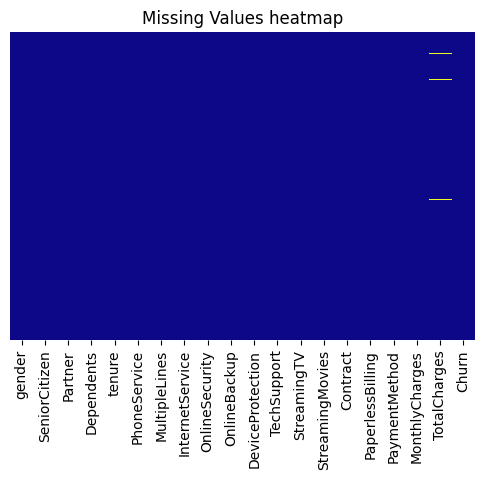

In [8]:
# check for missing values
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')
plt.title('Missing Values heatmap')
plt.show()

The heatmap shows that there are missing values only in the 'TotalCharges' columns.

Since the amount of missing values in 'TotalCharges' is not high, and the column 'MonthlyCharges' and 'tenure' are available, we can calculate the 'TotalCharges' by multiplying the other two columns.

In [9]:
# fill missing values in 'TotalCharges'
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'])

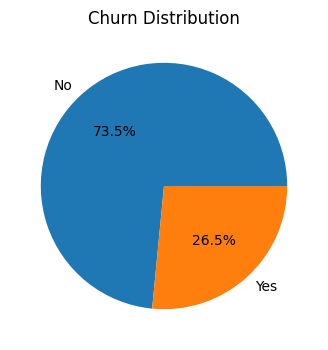

In [10]:
# display the distribution of 'Churn' column
plt.figure(figsize = (6,4))
plt.pie(df['Churn'].value_counts(), labels = df['Churn'].unique(), autopct = '%1.1f%%')
plt.title('Churn Distribution')
plt.show()

In [11]:
# average churn rate across the dataset
df['Churn'].value_counts(normalize = True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

# explore categorical variables

In [12]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
cat_column = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for c in cat_column:
    unique = df[c].nunique()
    print(f'number of unique for {c}: {unique}' )

number of unique for gender: 2
number of unique for SeniorCitizen: 2
number of unique for Partner: 2
number of unique for Dependents: 2
number of unique for PhoneService: 2
number of unique for MultipleLines: 3
number of unique for InternetService: 3
number of unique for OnlineSecurity: 3
number of unique for OnlineBackup: 3
number of unique for DeviceProtection: 3
number of unique for TechSupport: 3
number of unique for StreamingTV: 3
number of unique for StreamingMovies: 3
number of unique for Contract: 3
number of unique for PaperlessBilling: 2
number of unique for PaymentMethod: 4


Since the cardinality for each categorical variables are not high (<10), we proceed by using one-hot encoding for all the variables.

# explore numerical variables

C:\Users\TCL0011\AppData\Local\Temp\ipykernel_17144\3732146295.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


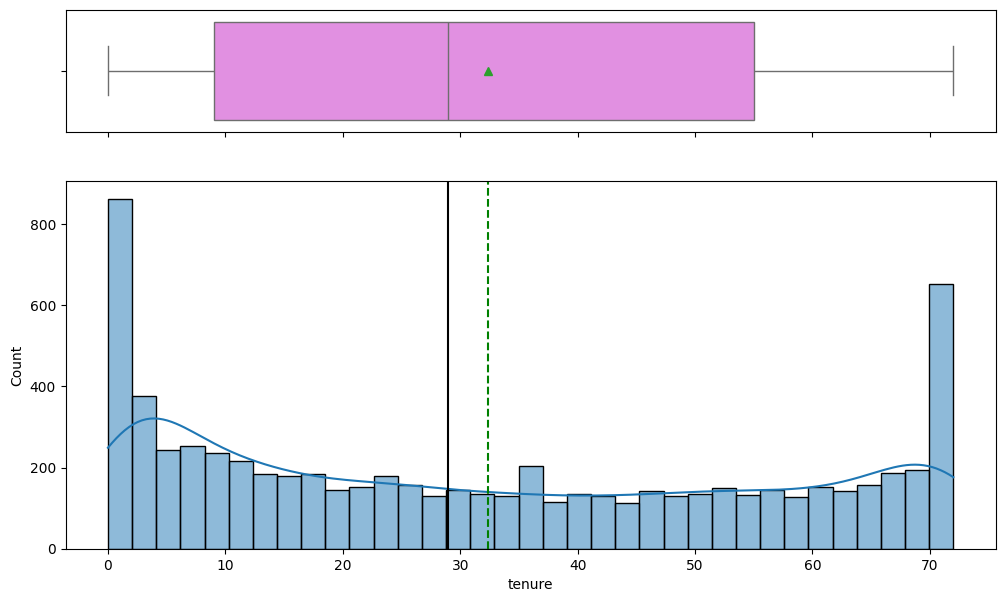

In [ ]:
# distribution of 'tenure' column
histogram_boxplot(df, 'tenure', kde = True, bins = 35)

'tenure' has bimodal distribution, where the first peak is at 0-4 months, and second is at around 70 months or above.


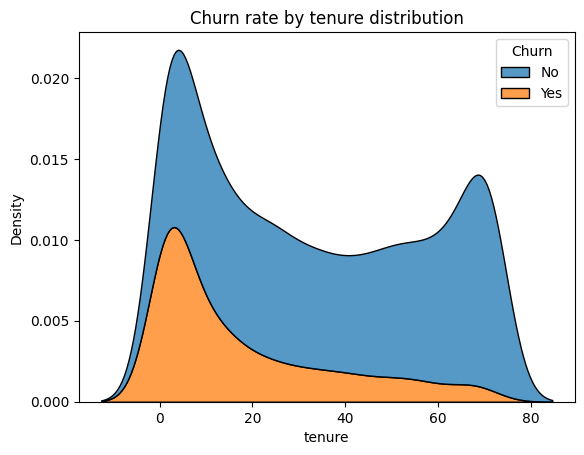

In [ ]:
# Churn rate by tenure distribution
sns.kdeplot(data = df, x = 'tenure', hue = 'Churn', multiple = 'stack')
plt.title('Churn rate by tenure distribution')
plt.show()

Churn rate peaked at low tenure months, and is much higher than the overall rate for the whole dataset, while churn rate of customers with more tan 70+ months is much lower than the overall rate. Illustrating that very old customers have high stickiness, while new customers have low stickiness toward the service.

C:\Users\TCL0011\AppData\Local\Temp\ipykernel_17144\3732146295.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


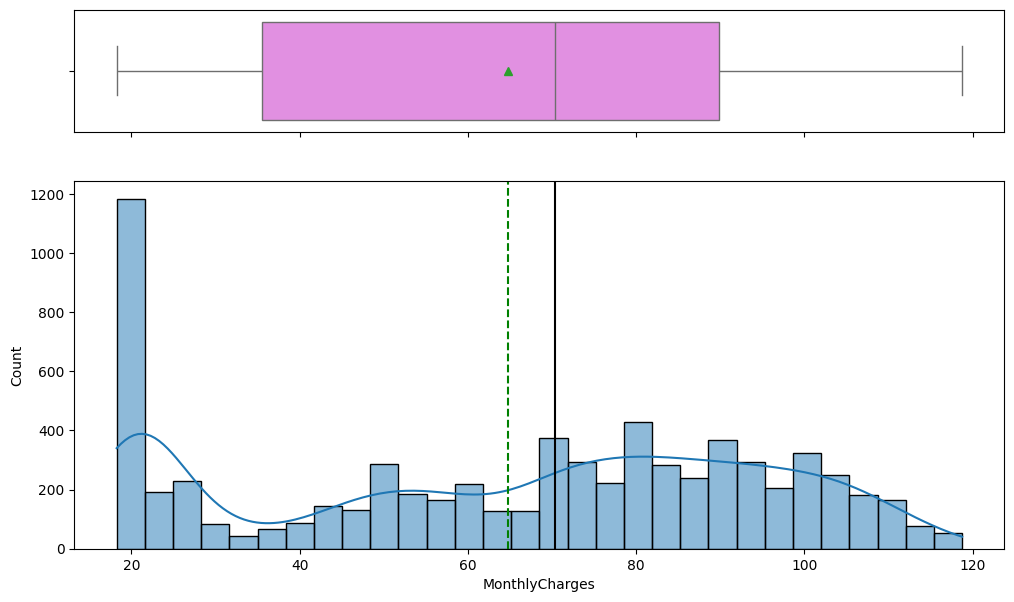

In [42]:
# distribution of 'MonthlyCharges' column
histogram_boxplot(df, 'MonthlyCharges', kde = True, bins = 30)

High percentage of customers subscribe to plans with low cost (~$20-22), and the other customers have monthly charges at around $80.

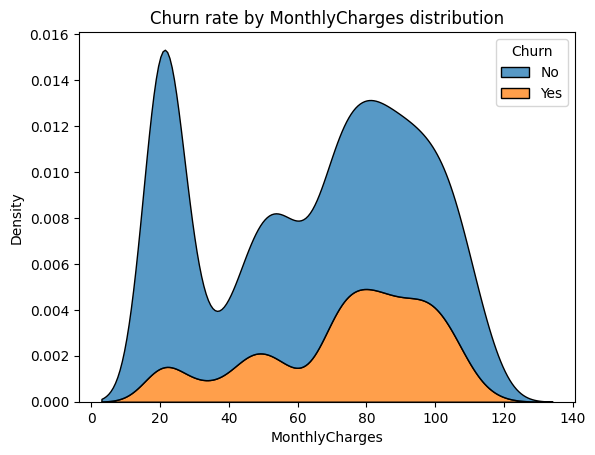

In [51]:
# Churn rate by monthly charges distribution
sns.kdeplot(data = df, x = 'MonthlyCharges', hue = 'Churn', multiple = 'stack')
plt.title('Churn rate by MonthlyCharges distribution')
plt.show()

The low cost group shows low rate of churning

C:\Users\TCL0011\AppData\Local\Temp\ipykernel_17144\3732146295.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


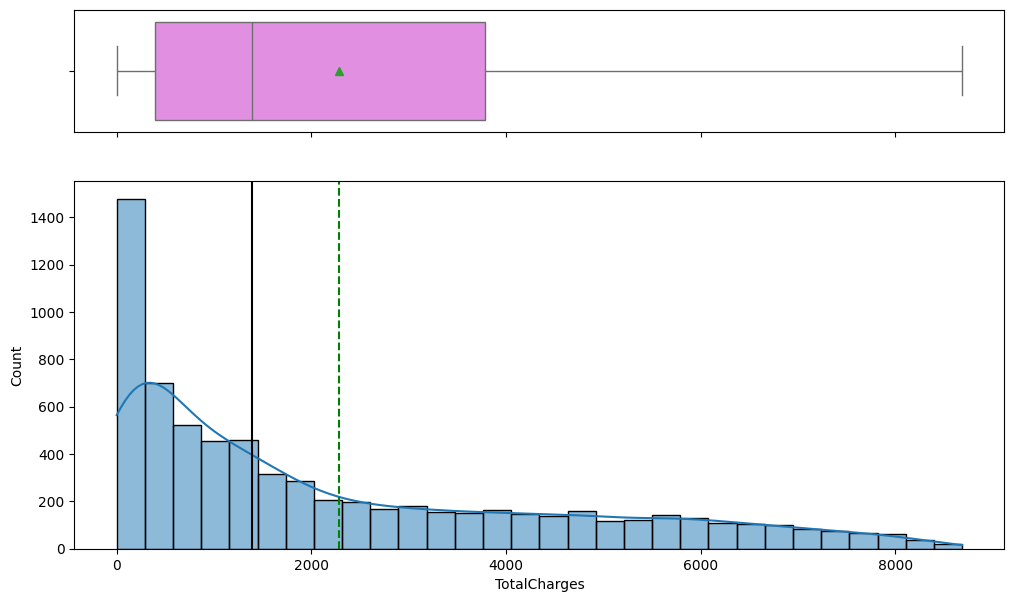

In [48]:
histogram_boxplot(df, 'TotalCharges', kde = True, bins = 30)

Total charges shows a rightskewed distribution with median (green line) and the mean (black line) with a higher difference when comparing to the other continuous variables. indicating that there are some customers with very high total charges, either long subscription period or high monthly cost.

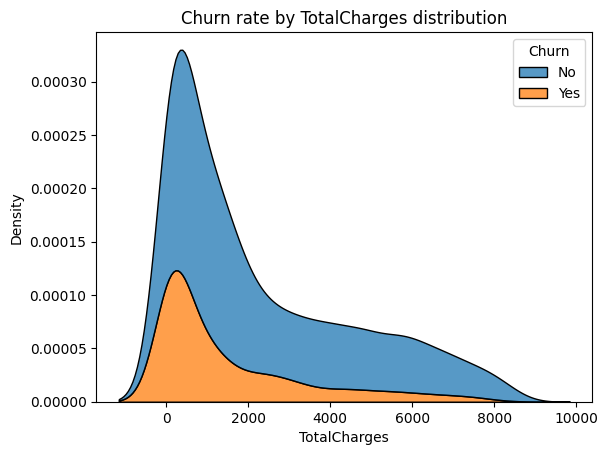

In [52]:
# Churn rate by TotalCharges distribution
sns.kdeplot(data = df, x = 'TotalCharges', hue = 'Churn', multiple = 'stack')
plt.title('Churn rate by TotalCharges distribution')
plt.show()

Churn rate peaked at low total charges

# Categorical Variables

In [57]:
cat_var = df.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)

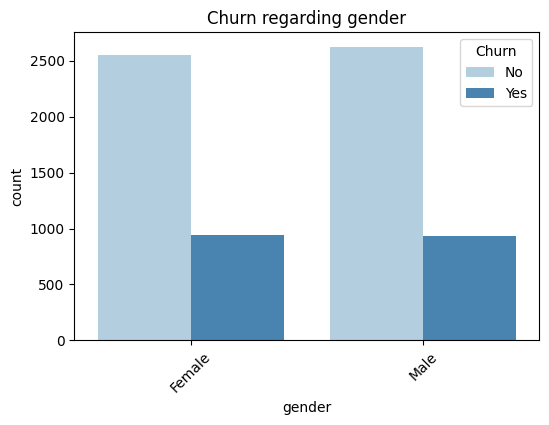

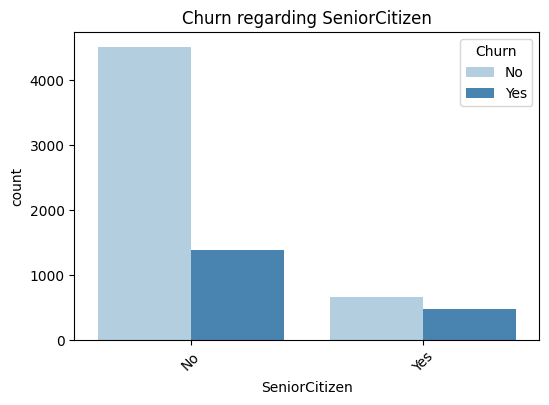

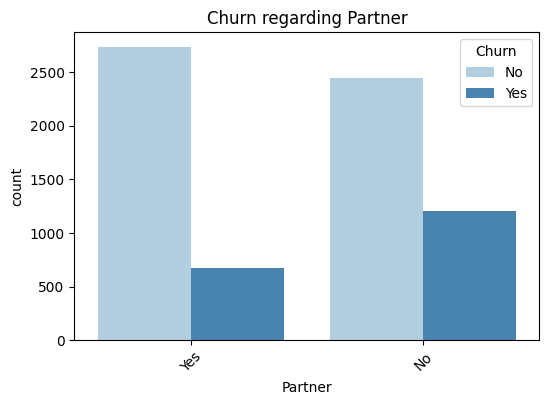

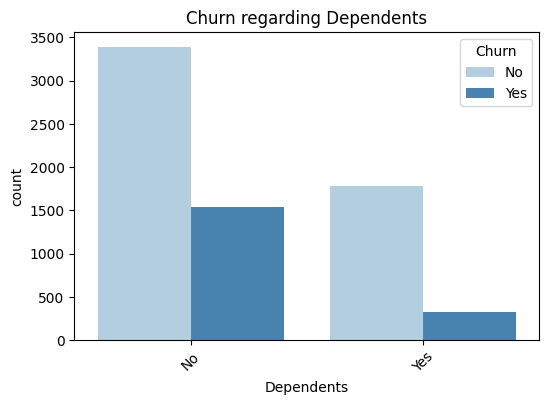

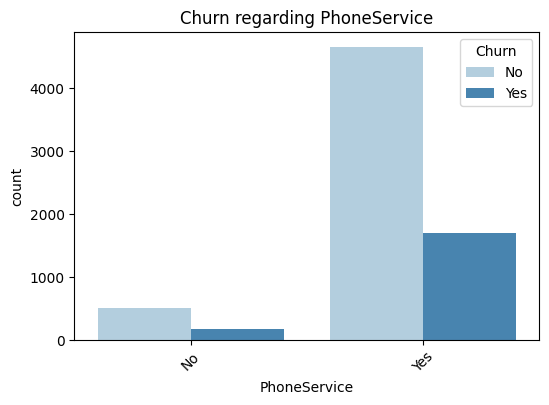

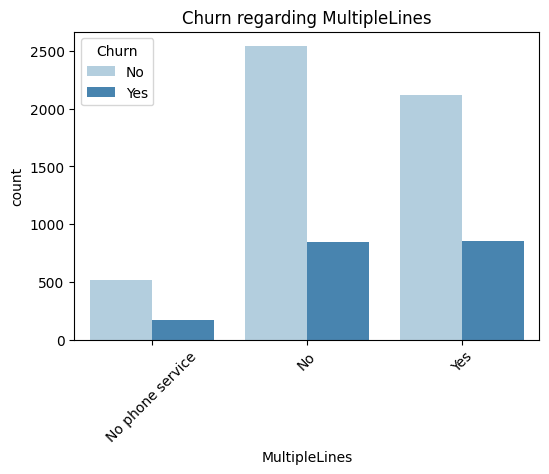

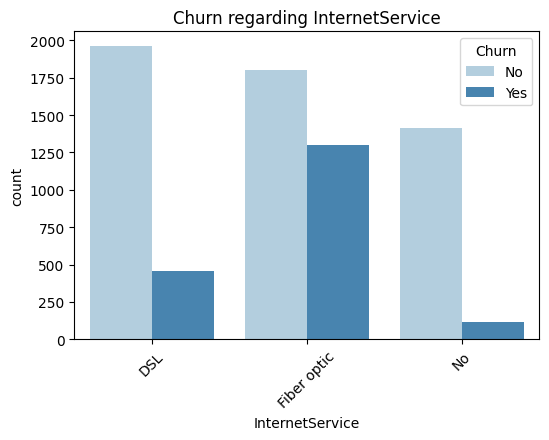

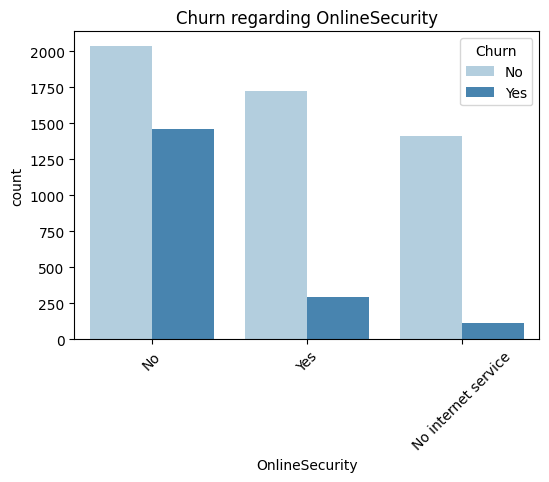

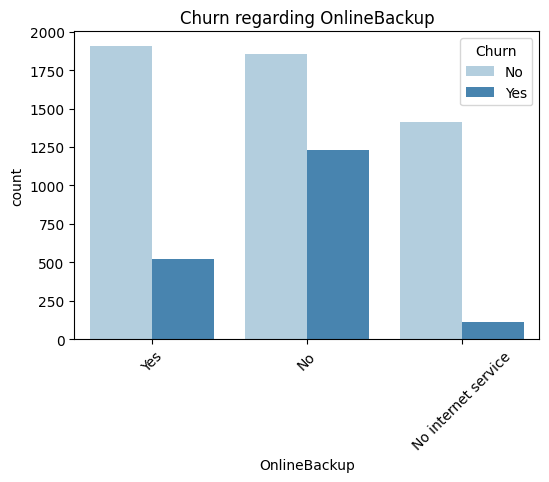

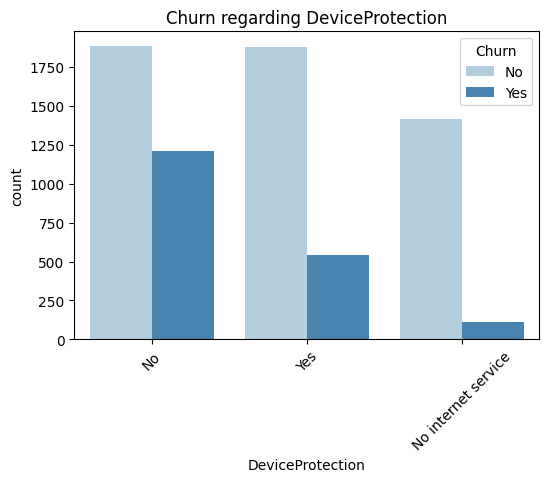

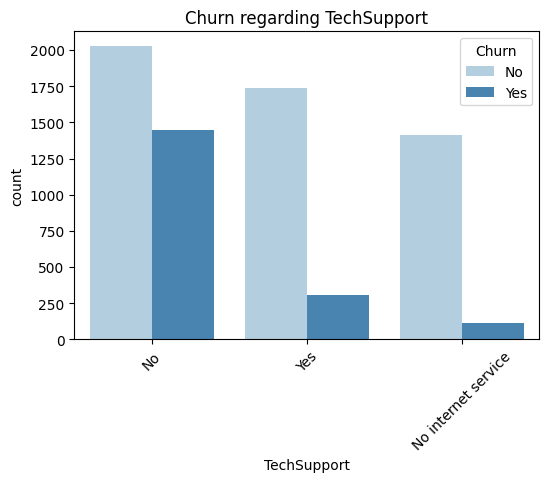

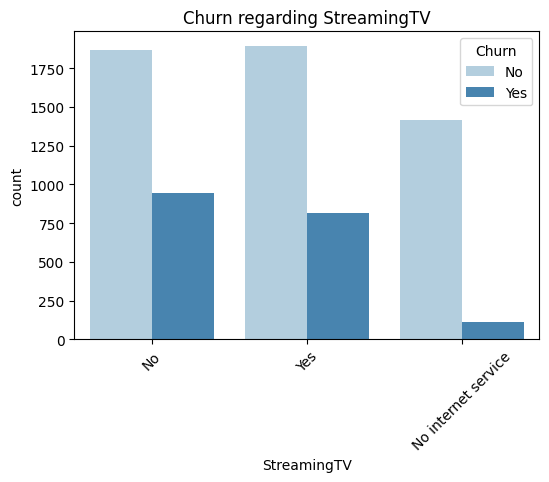

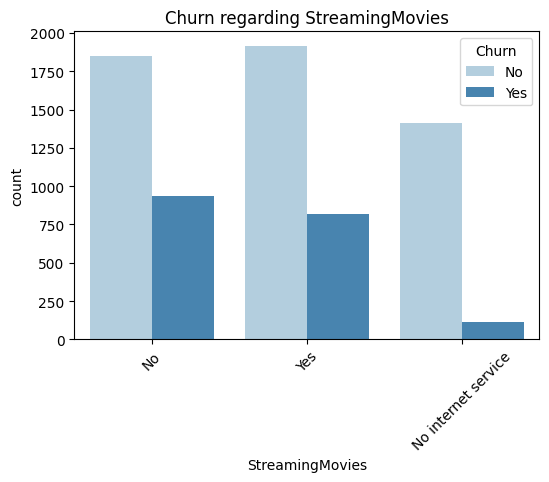

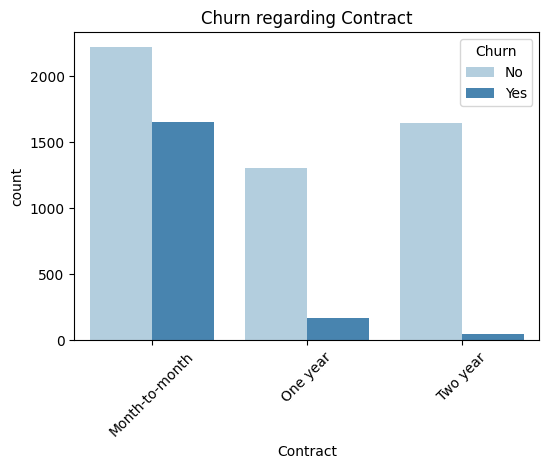

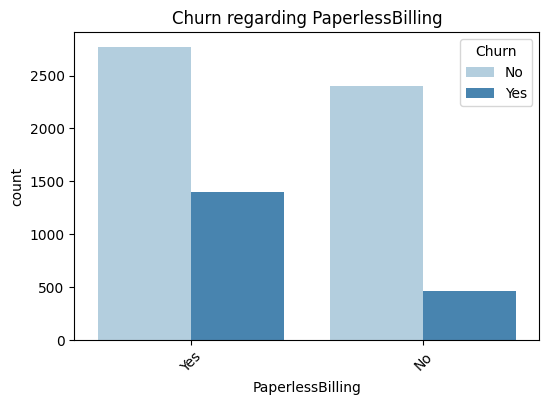

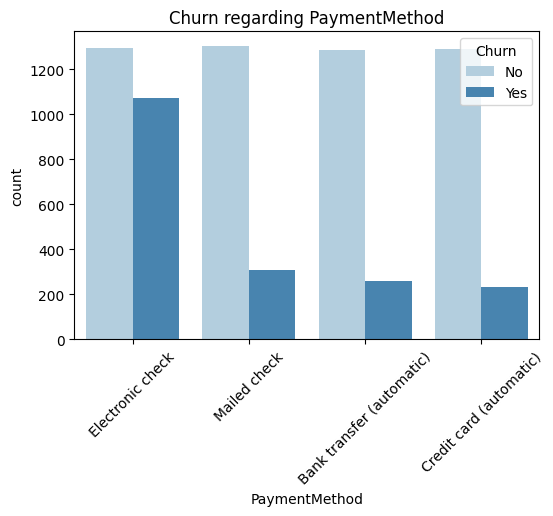

In [59]:
for i in cat_var.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.countplot(data = cat_var, x = i, hue = 'Churn', palette = 'Blues')
    plt.title(f'Churn regarding {i}')
    plt.xticks(rotation = 45)
    plt.show()